# AI homework
Nelle successive righe creerò un'infrastruttura generale su cui poter eseguire un qualsiasi gioco specificando semplicemente la particolare situazione in cui ci si trova in un dato momento e la prossima azione da compiere in quella stessa configurazione.
Successivamente in questo notebook definirò i componenti necessari per tentare di risolvere il gioco del 15 (utilizzando un agente che segua la politica 'Best-fit'), e ancora creerò due agenti che giochino l'uno contro l'altro una partita di scacchi (mediante l'algoritmo MinMax).

In [1]:
class Infrastructure():

    def main(self, state, action):
        print("-" + str(action))
        print("\n")
        state.update(action)

Chiamando il metodo main() della classe Infrastructure si può simulare una partita ad un determinato gioco, il tipo di gioco è determinato dallo stato passato come argomento. In particolare, durante l'esecuzione viene interrogato iterativamente un agente (o degli agenti) che determina passo per passo le azioni da eseguire per ottenere una configurazione finale in base alla specifica istanza indicata.

## 15 Puzzle

In [2]:
class GreedyAgent:
    
    def __init__(self, heuristic):
        self.heuristic = heuristic

    def changeHeuristic(self, heuristic):
        self.heuristic == heuristic

    def execute(self, state):
        bestvalue = 100
        bestmove = "" #[]

        # MoveUp

        if state.moveUpEnabled():
            stateUp = copy.deepcopy(state)
            stateUp.update("MoveUp")
            
            if self.heuristic == "wrongPosition":
                if bestvalue > PuzzleHeuristic.wrongPositionHeuristic(stateUp):
                    bestvalue = PuzzleHeuristic.wrongPositionHeuristic(stateUp)
                    bestmove = "MoveUp"
            else:
                if bestvalue > PuzzleHeuristic.manhattanHeuristic(stateUp):
                    bestvalue = PuzzleHeuristic.manhattanHeuristic(stateUp)
                    bestmove = "MoveUp"
            #elif bestvalue == PuzzleHeuristic.wrongPositionHeuristic(stateUp:
            #   scelta = random.choice([bestmove, "MoveUp"])
            #   bestmove = scelta

        # MoveDown

        if state.moveDownEnabled():
            stateDown = copy.deepcopy(state)
            stateDown.update("MoveDown") 
            
            if self.heuristic == "wrongPosition":
                if bestvalue > PuzzleHeuristic.wrongPositionHeuristic(stateDown):
                    bestvalue = PuzzleHeuristic.wrongPositionHeuristic(stateDown)
                    bestmove = "MoveDown"
            else:
                 if bestvalue > PuzzleHeuristic.manhattanHeuristic(stateDown):
                    bestvalue = PuzzleHeuristic.manhattanHeuristic(stateDown)
                    bestmove = "MoveDown"
            #elif bestvalue == PuzzleHeuristic.wrongPositionHeuristic(stateDown):
            #   bestmove.append("MoveDown")
            
        # MoveLeft

        if state.moveLeftEnabled():
            stateLeft = copy.deepcopy(state)
            stateLeft.update("MoveLeft")
            
            if self.heuristic == "wrongPosition":
                if bestvalue > PuzzleHeuristic.wrongPositionHeuristic(stateLeft):
                    bestvalue = PuzzleHeuristic.wrongPositionHeuristic(stateLeft)
                    bestmove = "MoveLeft"
            else:
                if bestvalue > PuzzleHeuristic.manhattanHeuristic(stateLeft):
                    bestvalue = PuzzleHeuristic.manhattanHeuristic(stateLeft)
                    bestmove = "MoveLeft"
            #elif bestvalue == PuzzleHeuristic.wrongPositionHeuristic(stateLeft):
            #   bestmove.append("MoveLeft")
            
        # MoveRight

        if state.moveRightEnabled():
            stateRight = copy.deepcopy(state)
            stateRight.update("MoveRight")
            
            if self.heuristic == "wrongPosition":
                if bestvalue > PuzzleHeuristic.wrongPositionHeuristic(stateRight):
                    bestvalue = PuzzleHeuristic.wrongPositionHeuristic(stateRight)
                    bestmove = "MoveRight"
            else:
                 if bestvalue > PuzzleHeuristic.manhattanHeuristic(stateRight):
                    bestvalue = PuzzleHeuristic.manhattanHeuristic(stateRight)
                    bestmove = "MoveRight"
            #elif bestvalue == PuzzleHeuristic.wrongPositionHeuristic(stateRight):
            #   bestmove.append("MoveRight")
        
        #if len(bestmove)>1:
        #   scelta = random.choice(bestmove)
        #   return scelta
        return bestmove #[0]

Ogni volta che viene interrogato, l'agente precedente esegue tutte le azioni ammissibili rispetto alla situazione attuale e sceglie quella che, secondo l'euristica utilizzata, permette di avvicinarsi il più possibile alla soluzione. L'algoritmo utilizzato quindi è di tipo greedy e per questo con la maggior parte delle configurazioni iniziali prima o poi formerà un loop infinito. 
Le linee di codice commentate sono delle possibili modifiche da apportare all'algoritmo per aggiungere una scelta casuale ogniqualvolta ci sia più di un'azione 'ottima' per una data configurazione, in modo da evitare situazioni in cui l'algoritmo continui a ciclare su due stati indefinitamente. Questa alternativa non risolve il problema, semplicemente forma dei cicli più grandi (che coinvolgono più stati), per questo ho deciso di non inserirla nella soluzione finale.

In [3]:
class PuzzleHeuristic:

    # First heuristic
    @staticmethod
    def wrongPositionHeuristic(state):
        fuoriposto = 0
        for i in range(1, 16):
            number = state.get(i)
            if number == 0:
                fuoriposto = fuoriposto+2
            elif number != i:
                fuoriposto = fuoriposto+1
                
        return fuoriposto


    # Second heuristic
    @staticmethod
    def manhattanHeuristic(state):
        somma = 0
        for i in range(1, 16):
            number = state.get(i)
            if number == 0:
                verticale = 3-math.trunc((i-1)/4)
                orizzontale = 3-((i-1)%4)
                somma = somma+orizzontale+verticale
            else:
                verticale = (math.trunc((number-1)/4))-(math.trunc((i-1)/4))
                orizzontale = ((number-1)%4)-((i-1)%4)
                somma = somma+abs(verticale)+abs(orizzontale)

        return somma

L'agente greedy può lavorare seguendo due semplici euristiche: una si basa sul numero di caselle che si trovano nel posto sbagliato (wrongPositionHeuristic), l'altra calcola la distanza di Manhattan per ogni casella e basa le proprie valutazioni sulla somma di tutte le distanze calcolate (ManhattanHeuristic).

In [4]:
class BreadthFirstAgent:
	def pick(self, list, i):
		return list[i]

	def nextLevelNeighbors(self, state):
		neighborhood = []
		if state.moveUpEnabled():
			stateUp = copy.deepcopy(state)
			stateUp.update("MoveUp")
			neighborhood.append(stateUp)
		if state.moveDownEnabled():
			stateDown = copy.deepcopy(state)
			stateDown.update("MoveDown")
			neighborhood.append(stateDown)
		if state.moveLeftEnabled():
			stateLeft = copy.deepcopy(state)
			stateLeft.update("MoveLeft")
			neighborhood.append(stateLeft)
		if state.moveRightEnabled():
			stateRight = copy.deepcopy(state)
			stateRight.update("MoveRight")
			neighborhood.append(stateRight)
		return neighborhood


	def execute(self, state):
		i = 0
		moves = 0
		for j in range(80):
			moves = moves+pow(4, j)	
		horizon = [state]
		count = 0
		while len(horizon) != 0 and count < moves:
			view = self.pick(horizon, i)
			i = i+1
			if view.final():
				return True
			neighborhood = self.nextLevelNeighbors(view)
			count = count+1
			horizon.extend(neighborhood);
		
		return False

In più articoli è stato dimostrato che il gioco del 15 non può essere sempre risolto, in particolare, per configurazioni risolvibili, il massimo numero di mosse da eseguire prima di ottenere la soluzione finale è 80. Ho utilizzato questo upper bound al numero di mosse e un agente BreadthFirst per riconoscere i puzzle non risolvibili, infatti l'agente tornerà "True" quando esiste una sequenza di mosse che permetta di risolvere il puzzle, "False" altrimenti.

In [5]:
class PuzzleState():

    def __init__(self):
        self.count = 0
        self.agent = GreedyAgent('wrongPosition')
        
        # Generate a random array

        # self.array = np.arange(16)
        # np.random.shuffle(self.array)
        # self.array = self.array.reshape((4,4))
        
        self.array = [[2,1,5,13],[3,6,9,10],[4,7,15,14],[8,0,11,12]]
        self.calculateSolvability()

    def calculateSolvability(self):
        # Calcolo se l'istanza iniziale è risolvibile
        inversioni = 0
        for i in range(4):
            for j in range(4):
                if not(self.array[j][i] == 0):
                    for k in range(i, 4):
                        if k == i:
                            for z in range(j+1, 4):
                                if self.array[z][k] != 0 and self.array[z][k] < self.array[j][i]:
                                    inversioni = inversioni+1
                        else:
                            for z in range(4):
                                if self.array[z][k] != 0 and self.array[z][k] < self.array[j][i]:
                                    inversioni = inversioni+1
                else:
                    inversioni = inversioni+i+1
        if ((inversioni)%2) != 0:
            self.solvability = False
        else:
            self.solvability = True
    #   self.solvability = True
    #   self.checkSolvability()
    
    #def checkSolvability(self):
    #   agent = BreadthFirstAgent()
    #   if agent.execute(self):
    #      self.solvability = True
    #   else:
    #      self.solvability = False"""
    
    def nextAction(self):
        self.count = self.count + 1
        action = self.agent.execute(self)
        return action

    def moveUpEnabled(self):
        for i in range(4):
            for j in range(4):
                if (self.array[i][j] == 0):
                    colonna = i
                    riga = j
        if not(riga == 3):
            return True
        else:
            return False

    def moveDownEnabled(self):
        for i in range(4):
            for j in range(4):
                if (self.array[i][j] == 0):
                    colonna = i
                    riga = j
        if not(riga == 0):
            return True
        else:
            return False

    def moveLeftEnabled(self):
        for i in range(4):
            for j in range(4):
                if (self.array[i][j] == 0):
                    colonna = i
                    riga = j
        if not(colonna == 3):
            return True
        else:
            return False

    def moveRightEnabled(self):
        for i in range(4):
            for j in range(4):
                if (self.array[i][j] == 0):
                    colonna = i
                    riga = j
        if not(colonna == 0):
            return True
        else:
            return False
        
    def changeHeuristic(self, heuristic):
        self.agent.changeHeuristic(heuristic)
        
    def changeArray(self, array):
        self.array = array
        self.calculateSolvability()

    def update(self, bestmove):
        for i in range(4):
            for j in range(4):
                if (self.array[i][j] == 0):
                    colonna = i
                    riga = j

        if bestmove == "MoveUp":
            a = self.array[colonna][riga]
            self.array[colonna][riga] = self.array[colonna][riga+1]
            self.array[colonna][riga+1] = a
        elif bestmove == "MoveDown":
            a = self.array[colonna][riga]
            self.array[colonna][riga] = self.array[colonna][riga-1]
            self.array[colonna][riga-1] = a
        elif bestmove == "MoveLeft":
            a = self.array[colonna][riga]
            self.array[colonna][riga] = self.array[colonna+1][riga]
            self.array[colonna+1][riga] = a
        elif bestmove == "MoveRight":
            a = self.array[colonna][riga]
            self.array[colonna][riga] = self.array[colonna-1][riga]
            self.array[colonna-1][riga] = a

    def show(self):
        stringa =""

        for i in range(4):
            for j in range(4):
                stringa = stringa+str(self.array[j][i]).ljust(3)
            stringa = stringa+"\n"

        print(stringa)
        print('\n')

    def get(self, place):
        colonna = math.trunc((place-1)/4)
        riga = (place-1)%4
        return self.array[riga][colonna]

    def final(self):
        if not(self.solvability):
            return True
        fuoriposto = 0
        for i in range(4):
            for j in range(4):
                if self.array[i][j] == 0:
                    if i != 3 or j != 3:
                        fuoriposto = fuoriposto+1
                elif self.array[i][j] != ((j*4)+(i+1)):
                    fuoriposto = fuoriposto+1
        if fuoriposto == 0:
            return True
        
    def result(self):
        print("\nA total of "+str(self.count)+" moves were performed.")

Infine la classe State contiene tutta la logica relativa al gioco a cui si vuole giocare. I metodi messi a disposizione in questa classe permettono di memorizzare, visualizzare e manipolare i dati relativi alla rappresentazione del problema affrontato, in questo caso il gioco del 15.
Per controllare la risolvibilità del puzzle preso in input l'agente BreadthFirst potrebbe impiegare un tempo inaccettabile, per questo ho lasciato commentato il codice relativo all'utilizzo di questa entità e ho aggiunto delle righe molto più performanti, dove sfrutto una proprietà molto semplice che è necessaria e sufficiente per la risolvibilità del puzzle. Questa proprietà afferma che se il numero totale di inversioni per la permutazione data è pari, allora il puzzle è risolvibile.

In [6]:
import numpy as np
import math
import random
import copy

infrastructure = Infrastructure()

state = PuzzleState()

print('Start situation\n')
state.show()
print('Sequence of moves:\n')

while not(state.final()):
    action = state.nextAction()
    infrastructure.main(state, action)
    state.show()

print('Final situation\n')
state.show()
state.result()

Start situation

2  3  4  8  
1  6  7  0  
5  9  15 11 
13 10 14 12 



Sequence of moves:

-MoveDown


2  3  4  0  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveRight


2  3  0  4  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveRight


2  0  3  4  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveRight


0  2  3  4  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveUp


1  2  3  4  
0  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveUp


1  2  3  4  
5  6  7  8  
0  9  15 11 
13 10 14 12 



-MoveLeft


1  2  3  4  
5  6  7  8  
9  0  15 11 
13 10 14 12 



-MoveUp


1  2  3  4  
5  6  7  8  
9  10 15 11 
13 0  14 12 



-MoveLeft


1  2  3  4  
5  6  7  8  
9  10 15 11 
13 14 0  12 



-MoveDown


1  2  3  4  
5  6  7  8  
9  10 0  11 
13 14 15 12 



-MoveLeft


1  2  3  4  
5  6  7  8  
9  10 11 0  
13 14 15 12 



-MoveUp


1  2  3  4  
5  6  7  8  
9  10 11 12 
13 14 15 0  



Final situation

1  2  3  4  
5  6  7  8  
9  10 11 12 
13 14 15 0  




A total of 12 moves were performed.


Questo era un esempio di esecuzione su un'istanza abbastanza semplice, che l'algoritmo risolve in 12 passi con la prima euristica. Utilizzando la stessa configurazione iniziale provo un'esecuzione con la seconda euristica.

In [7]:
state = PuzzleState()
state.changeHeuristic('manhattan')

print('Start situation\n')
state.show()
print('Sequence of moves:\n')

while not(state.final()):
    action = state.nextAction()
    infrastructure.main(state, action)
    state.show()

print('Final situation\n')
state.show()
state.result()

Start situation

2  3  4  8  
1  6  7  0  
5  9  15 11 
13 10 14 12 



Sequence of moves:

-MoveDown


2  3  4  0  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveRight


2  3  0  4  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveRight


2  0  3  4  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveRight


0  2  3  4  
1  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveUp


1  2  3  4  
0  6  7  8  
5  9  15 11 
13 10 14 12 



-MoveUp


1  2  3  4  
5  6  7  8  
0  9  15 11 
13 10 14 12 



-MoveLeft


1  2  3  4  
5  6  7  8  
9  0  15 11 
13 10 14 12 



-MoveUp


1  2  3  4  
5  6  7  8  
9  10 15 11 
13 0  14 12 



-MoveLeft


1  2  3  4  
5  6  7  8  
9  10 15 11 
13 14 0  12 



-MoveDown


1  2  3  4  
5  6  7  8  
9  10 0  11 
13 14 15 12 



-MoveLeft


1  2  3  4  
5  6  7  8  
9  10 11 0  
13 14 15 12 



-MoveUp


1  2  3  4  
5  6  7  8  
9  10 11 12 
13 14 15 0  



Final situation

1  2  3  4  
5  6  7  8  
9  10 11 12 
13 14 15 0  




A total of 12 moves were performed.


Anche in questo caso l'algoritmo risolve il puzzle effettuando una sequenza di 12 mosse, che è anche la sequenza minima di azioni da implementare per risolverlo rispetto alla data istanza iniziale. Per istanze più complicate, come già spiegato, un semplice agente 'Best-fit' non è in grado di risolvere il puzzle, andrà invece a ciclare sulle mosse che valuta migliori.
Come ultimo esempio provo a dare in input all'infrastruttura un'istanza non risolvibile, vedremo che infatti l'agente non eseguirà nemmeno una mossa e la configurazione finale riportata sarà uguale a quella iniziale.

In [8]:
array = [[1,5,9,15],[2,6,10,14],[3,7,11,13],[4,8,12,0]]

state = PuzzleState()
state.changeArray(array)

print('Start situation\n')
state.show()
print('Sequence of moves:\n')

while not(state.final()):
    action = state.nextAction()
    infrastructure.main(state, action)
    state.show()

print('Final situation\n')
state.show()
state.result()

Start situation

1  2  3  4  
5  6  7  8  
9  10 11 12 
15 14 13 0  



Sequence of moves:

Final situation

1  2  3  4  
5  6  7  8  
9  10 11 12 
15 14 13 0  




A total of 0 moves were performed.


## Chess MinMax

In [9]:
# Costants used in the positional heuristic
VALUES =	[ 
#PEDONE
[[0, 5, 1, 0.5, 0, 0.5, 0.5, 0],
[0, 5, 1, 0.5, 0, -0.5, 1, 0],
[0, 5, 2, 1, 0, -1, 1, 0],
[0, 5, 3, 2.5, 2, 0, -2, 0],
[0, 5, 3, 2.5, 2, 0, -2, 0],
[0, 5, 2, 1, 0, -1, 1, 0],
[0, 5, 1, 0.5, 0, -0.5, 1, 0],
[0, 5, 1, 0.5, 0, 0.5, 0.5, 0]],
#CAVALLO
[[-5, -4, -3, -3, -3, -3, -4, -5],
[-4, -2, 0, 0.5, 0, 0.5, -2, -4],
[-3, 0, 1, 1.5, 1.5, 1, 0, -3],
[-3, 0, 1.5, 2, 2, 1.5, 0.5, -3],
[-3, 0, 1.5, 2, 2, 1.5, 0.5, -3],
[-3, 0, 1, 1.5, 1.5, 1, 0, -3],
[-4, -2, 0, 0.5, 0, 0.5, -2, -4],
[-5, -4, -3, -3, -3, -3, -4, -5]],
#ALFIERE
[[-2, -1, -1, -1, -1, -1, -1, -2],
[-1, 0, 0, 0.5, 0, 1, 0.5, -1],
[-1, 0, 0.5, 0.5, 1, 1, 0, -1],
[-1, 0, 1, 1, 1, 1, 0, -1],
[-1, 0, 1, 1, 1, 1, 0, -1],
[-1, 0, 0.5, 0.5, 1, 1, 0, -1],
[-1, 0, 0, 0.5, 0, 1, 0.5, -1],
[-2, -1, -1, -1, -1, -1, -1, 2]],
#TORRE
[[0, 0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0.5],
[0, 1, 0, 0, 0, 0, 0, 0.5],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0],
[0, 0.5, -0.5, -0.5, -0.5, -0.5, -0.5, 0]],
#REGINA
[[-2, -1, -1, -0.5, 0, -1, -1, -2],
[-1, 0, 0, 0, 0, 0.5, 0, -1],
[-1, 0, 0.5, 0.5, 0.5, 0.5, 0.5, -1],
[-0.5, 0, 0.5, 0.5, 0.5, 0.5, 0, -0.5],
[-0.5, 0, 0.5, 0.5, 0.5, 0.5, 0, -0.5],
[-1, 0, 0.5, 0.5, 0.5, 0.5, 0, -1],
[-1, 0, 0, 0, 0, 0, 0, -1],
[-2, -1, -1, -0.5, -0.5, -1, -1, -2]],
#RE
[[-3, -3, -3, -3, -2, -1, 2, 2],
[-4, -4, -4, -4, -3, -2, 2, 3],
[-4, -4, -4, -4, -3, -2, 0, 1],
[-5, -5, -5, -5, -4, -2, 0, 0],
[-5, -5, -5, -5, -4, -2, 0, 0],
[-4, -4, -4, -4, -3, -2, 0, 1],
[-4, -4, -4, -4, -3, -2, 2, 3],
[-3, -3, -3, -3, -2, -1, 2, 2]]
]

In [10]:
import sys
!{sys.executable} -m pip install chess
import chess
import chess.svg

Nel caso degli scacchi, come per il 15 Puzzle, ho creato una classe stato che ingloba tutte le caratteristiche del gioco. Quando un'istanza della classe viene creata vengono subito istanziati due agenti, l'agente relativo ai pezzi bianchi e quello relativo ai pezzi neri. Per decidere la prossima azione ogni agente considera tutte le possibili mosse attuabili in quella data configurazione e utilizza l'algoritmo MinMax, in questo caso con profondità uguale a 2.

In [11]:
class ChessState:
    
    def __init__(self):
        self.whiteAgent = Agent('white')
        self.blackAgent = Agent('black')
        self.board = chess.Board()
        self.count = 0
        
    def nextAction(self):
        self.count = self.count + 1
        if self.board.turn:
            action = self.whiteAgent.execute(self, 2)
        else:
            action = self.blackAgent.execute(self, 2)
            
        return action

    def show(self):
        display(self.board)
        print("\n")

    def update(self, action):
        self.board.push(action)

    def undo(self):
        self.board.pop()

    def possibleMoves(self):
        return self.board.legal_moves

    def result(self):
        print(self.board.result())

        if self.board.is_checkmate():
            print("Cause of termination: Checkmate")
        elif self.board.is_stalemate():
            print("Cause of termination: Stalemate")
        elif self.board.is_insufficient_material():
            print("Cause of termination: Insufficient material")
        elif self.board.is_seventyfive_moves():
            print("Cause of termination: Seventyfive moves")
        elif self.board.is_fivefold_repetition():
            print("Cause of termination: Fivefold repetitions")
        elif self.board.can_claim_fifty_moves():
            print("Cause of termination: Fifty moves")
        elif self.board.can_claim_threefold_repetition():
            print("Cause of termination: Threefold moves")
            
        print(f'# of moves: {self.count}')


    def final(self):
        if self.board.is_checkmate() or self.board.is_stalemate() or self.board.is_insufficient_material() \
        or self.board.is_seventyfive_moves() or self.board.is_fivefold_repetition():
            return True

In [12]:
class Agent:

    def __init__(self, color):
        self.color = color
        
    @staticmethod
    def minmax(state, depth, is_maximizing_player, inizio):
        if depth == 0 or state.final():
            if state.board.is_checkmate():
                final_move_score = -100000 if is_maximizing_player else 100000
                return final_move_score
            
            evaluation = ChessHeuristic.evaluation(state)
            return evaluation  
  
        if is_maximizing_player:
            maxEva = -np.inf
            maxMove = None
            for move in state.possibleMoves():
                state.update(move)
                eva = Agent.minmax(state, depth-1, False, False)
                if eva > maxEva:
                    maxEva = eva
                    maxMove = move
                state.undo()
            if inizio:
                return maxEva, maxMove 
            else:
                return maxEva
        else:
            minEva= np.inf
            minMove = None
            for move in state.possibleMoves():
                state.update(move)
                eva = Agent.minmax(state, depth-1, True, False)
                if eva < minEva:
                    minEva = eva
                    minMove = move
                state.undo()
            if inizio:
                return minEva, minMove 
            else:
                return minEva

    def execute(self, state, depth):
        if self.color == 'black':
            eva, move = Agent.minmax(state, depth, False, True)
        else:
            eva, move = Agent.minmax(state, depth, True, True)
        return move

Ho definito tre diverse euristiche di base e una quarta che è derivata dalle prime tre. 
La prima euristica considera semplicemente la somma dei valori dei pezzi rimasti sulla scacchiera per ogni giocatore, la seconda considera e valuta la posizione sulla scachiera dei pezzi dei due giocatori, infine la terza, in base alla posizione sulla scacchiera dei pezzi, restituisce un valore che riflette la forza dell'attacco del giocatore che è in vantaggio in questo senso. L'ultima euristica è una combinazione lineare delle prime tre.
Ho impostato i vari parametri della combinazione lineare giocando diverse partite e cambiando i valori in modo da cercare di rendere il più possibile sensate le mosse che gli agenti decidono di intraprendere. L'euristica risultante si basa primariamente sulla valutazione del materiale, poi sull'assetto posizionale e infine sulla potenza degli eventuali attacchi.

In [13]:
class ChessHeuristic:

    # First heuristic
    @staticmethod
    def materialHeuristic(state):
        whiteScore = 0
        blackScore = 0

        for square in chess.SQUARES:
            piece = state.board.piece_at(square)
            if piece != None:
                if piece.piece_type == 1:
                    score = 1
                elif piece.piece_type == 2:
                    score = 3
                elif piece.piece_type == 3:
                    score = 3
                elif piece.piece_type == 4:
                    score = 5
                elif piece.piece_type == 5:
                    score = 9
                else:
                    score = 200
                if piece.color == True:
                    whiteScore = whiteScore + score
                else:
                    blackScore = blackScore + score
                
        return whiteScore - blackScore

    # Second heuristic
    @staticmethod
    def positionalHeuristic():
        for piece_type in chess.PIECE_TYPES:
            whiteScore = 0
            blackScore = 0
            
            for square in state.board.pieces(piece_type, chess.WHITE):
                whiteScore = whiteScore + VALUES[piece_type - 1][square % 8][7 - int(square / 8)]
            for square in chess.flip_vertical(state.board.pieces(piece_type, chess.BLACK)):
                blackScore = blackScore + VALUES[piece_type - 1][square % 8][7 - int(square / 8)]
        
        return whiteScore - blackScore

    # Third heuristic
    @staticmethod
    def attackHeuristic(state):
        attackAdvantage = 0

        for piece_type in chess.PIECE_TYPES:
            for piece in state.board.pieces(piece_type, chess.WHITE):
                attackAdvantage = attackAdvantage + len(chess.SquareSet(state.board.attacks_mask(piece)))

        for piece_type in chess.PIECE_TYPES:
            for piece in state.board.pieces(piece_type, chess.BLACK):
                attackAdvantage = attackAdvantage - len(chess.SquareSet(state.board.attacks_mask(piece)))

        return attackAdvantage

    # Mixed Heuristic
    @staticmethod
    def evaluation(state):
        # Returns a positive value if white player is in advantage, negative otherwise
        return ChessHeuristic.materialHeuristic(state) + 0.5 * ChessHeuristic.positionalHeuristic() + 0.3 \
    * ChessHeuristic.attackHeuristic(state)

Start situation



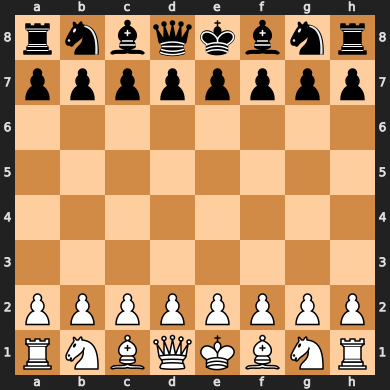



Sequence of moves:

-e2e3




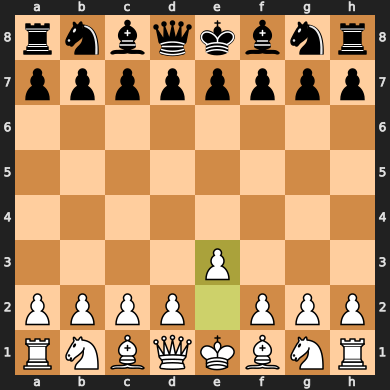



-e7e6




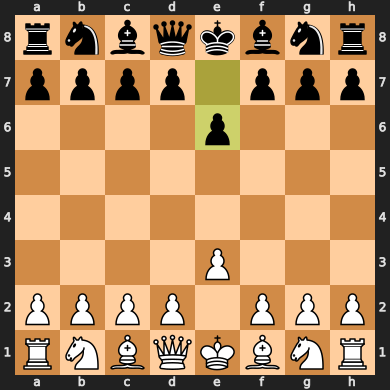



-d1g4




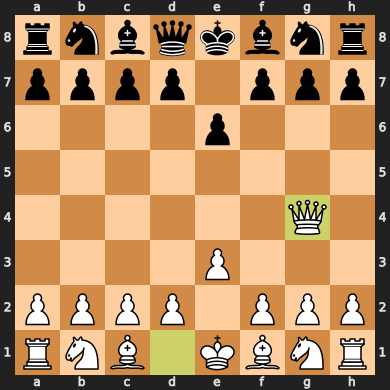



-d8f6




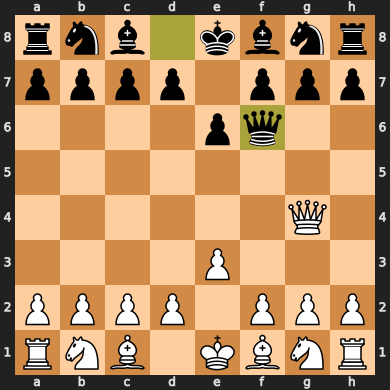



-f1d3




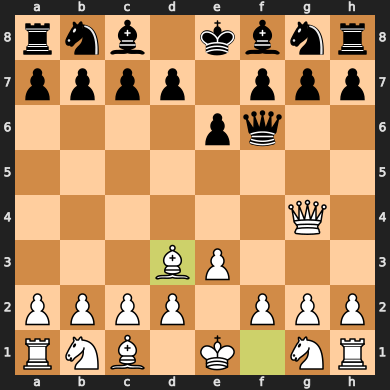



-b8c6




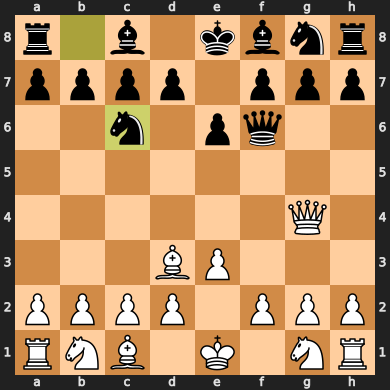



-g1h3




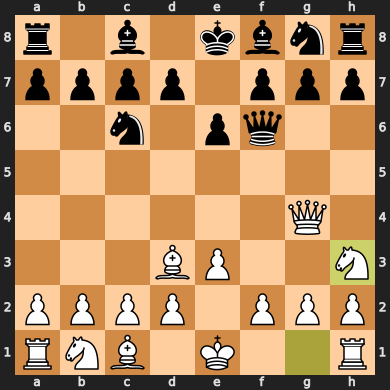



-f8d6




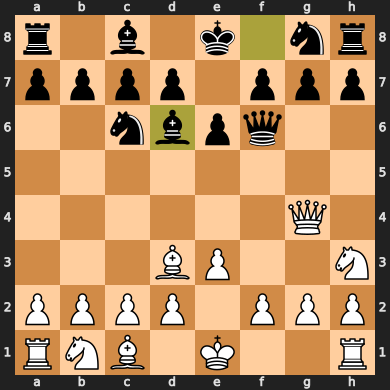



-e1g1




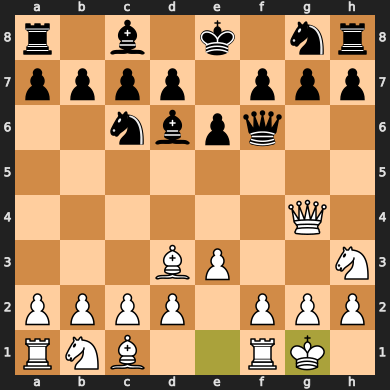



-g8e7




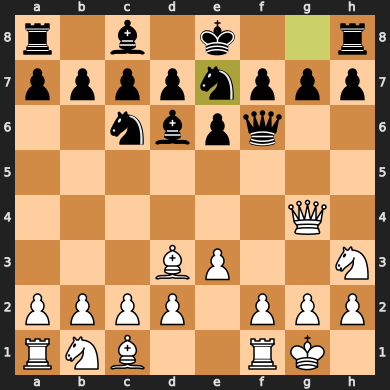



-a2a4




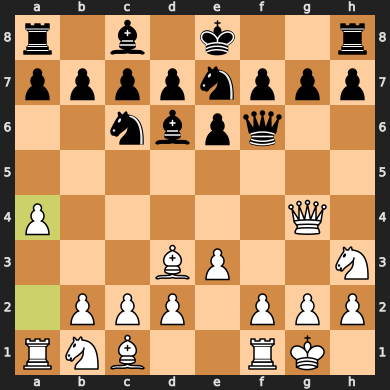



-e8g8




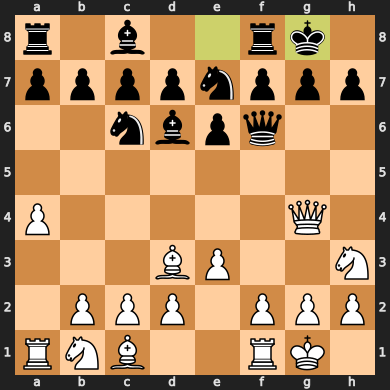



-f1e1




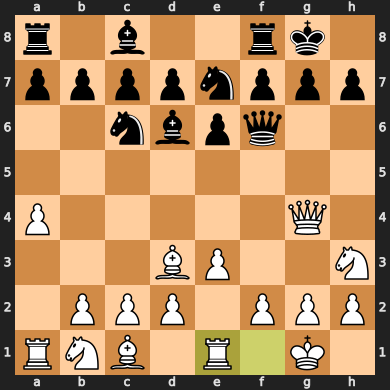



-e7d5




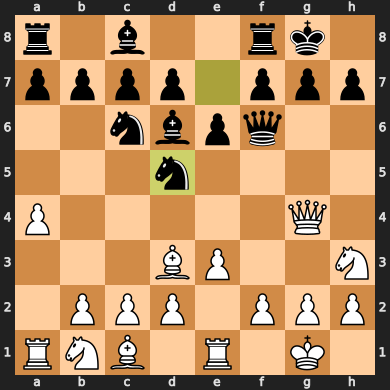



-c2c3




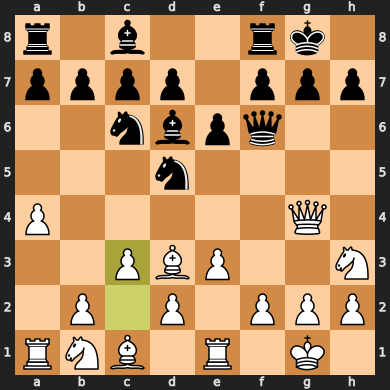



-a7a5




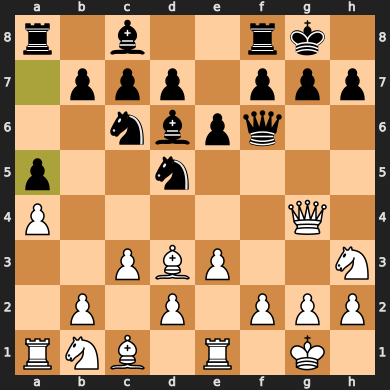



-b2b3




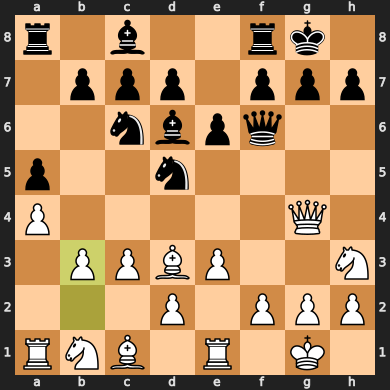



-f8e8




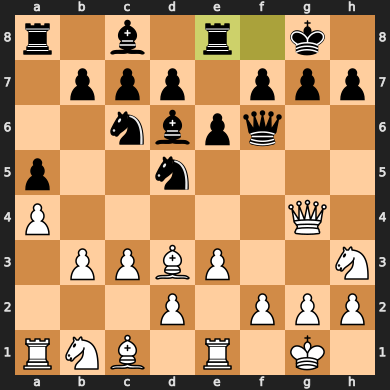



-c1b2




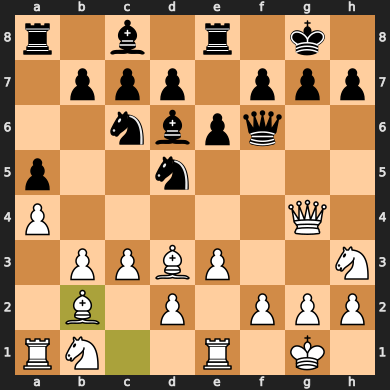



-g7g6




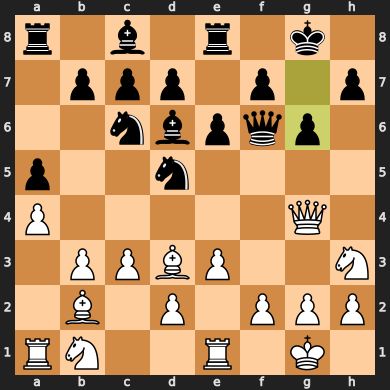



-e1c1




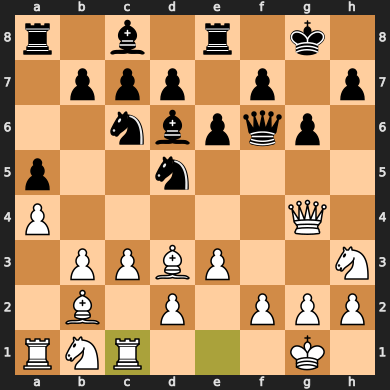



-g8g7




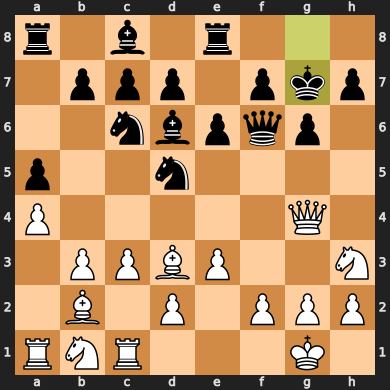



-c1e1




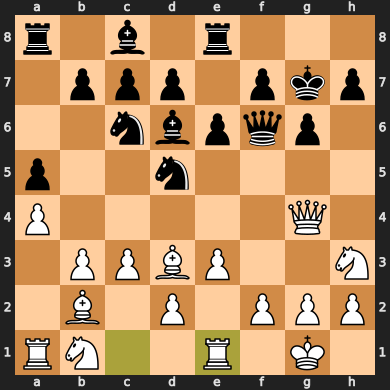



-b7b6




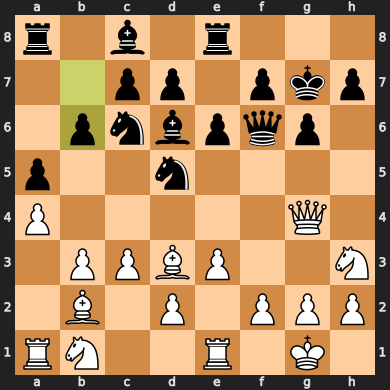



-e1c1




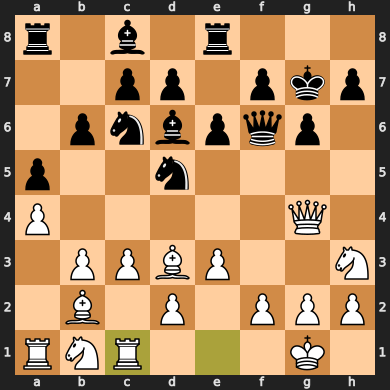



-c8b7




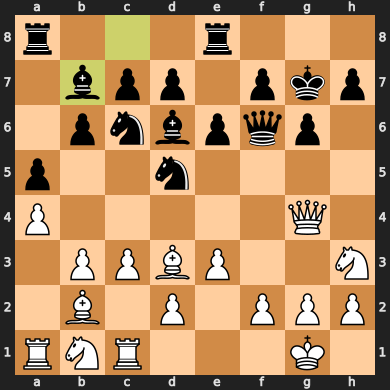



-c1e1




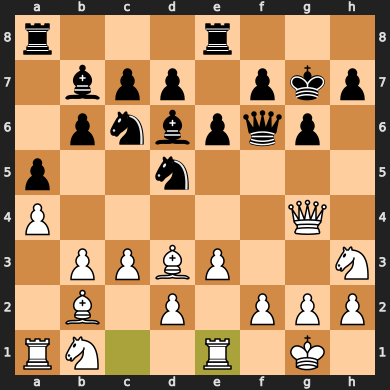



-e8h8




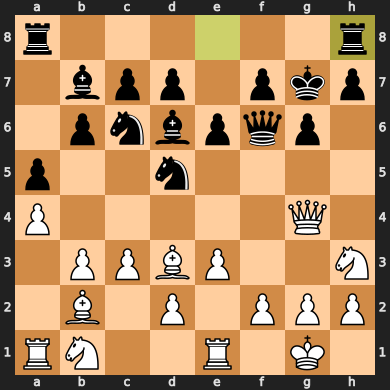



-e1c1




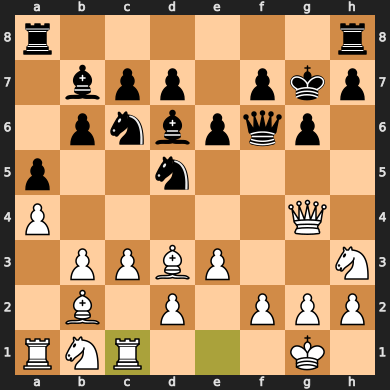



-h7h5




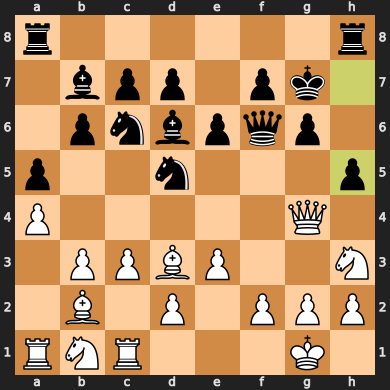



-g4e4




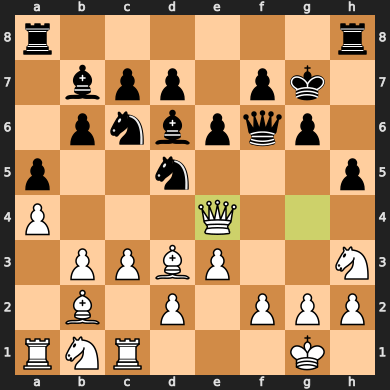



-d6h2




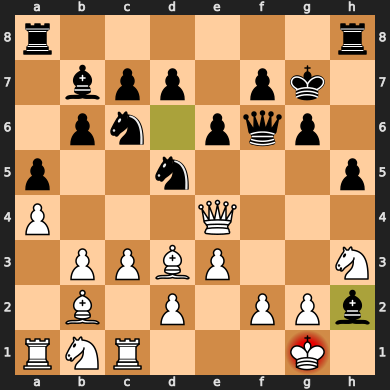



-g1h2




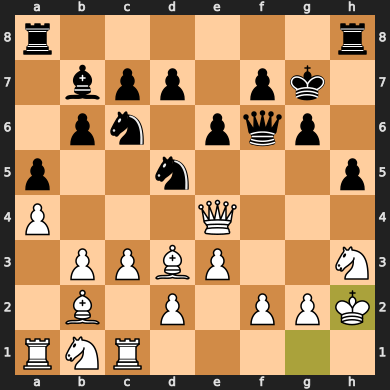



-d5e3




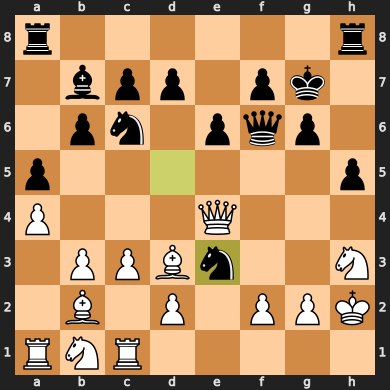



-e4e3




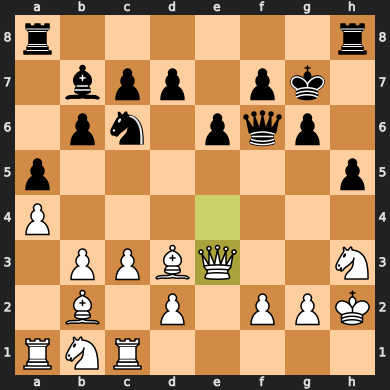



-c6e7




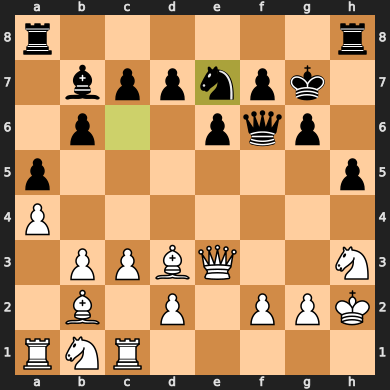



-b1a3




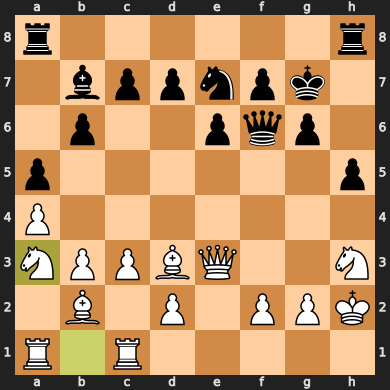



-b7d5




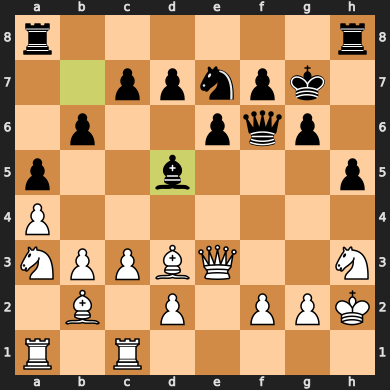



-c1h1




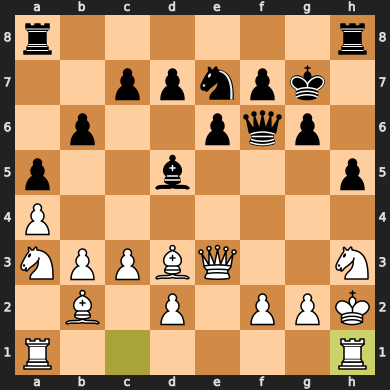



-d5b3




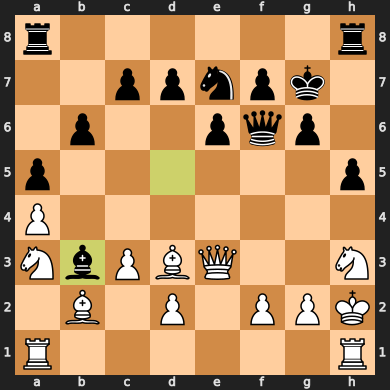



-a3b5




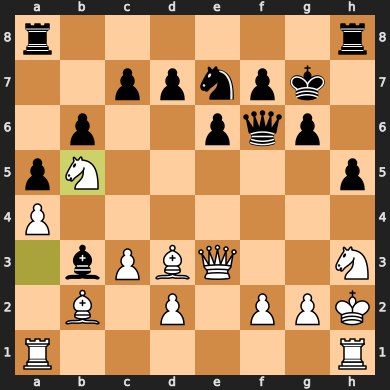



-e7c6




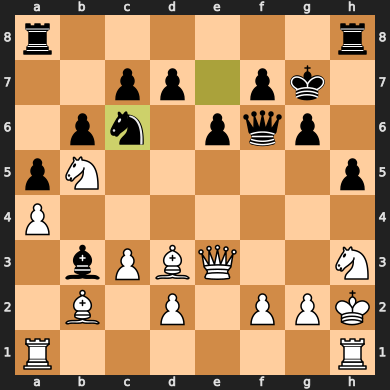



-b5c7




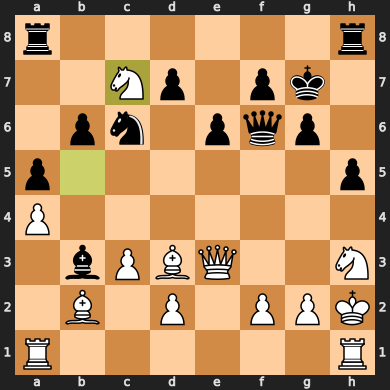



-a8b8




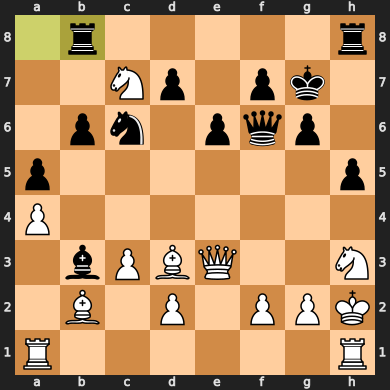



-b2a3




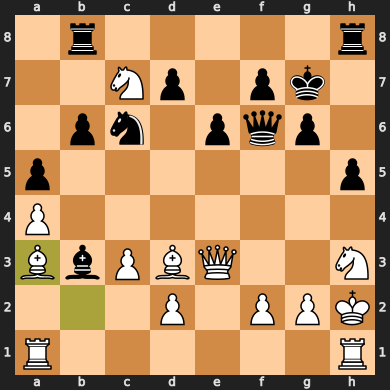



-b3a4




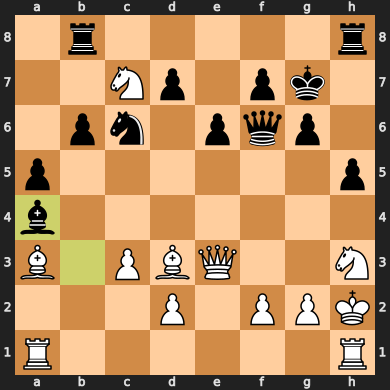



-a3d6




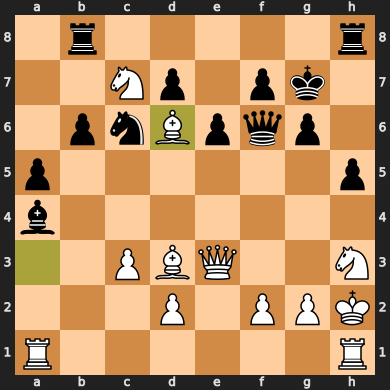



-a4b3




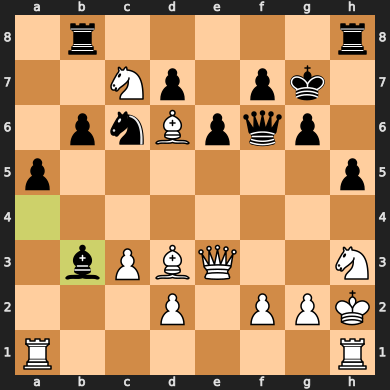



-e3e4




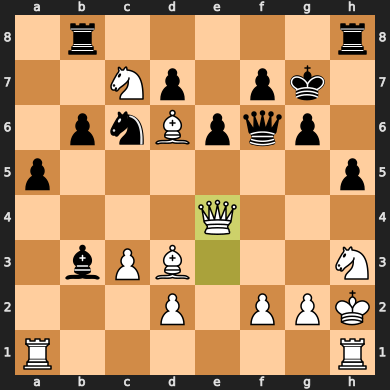



-b3d1




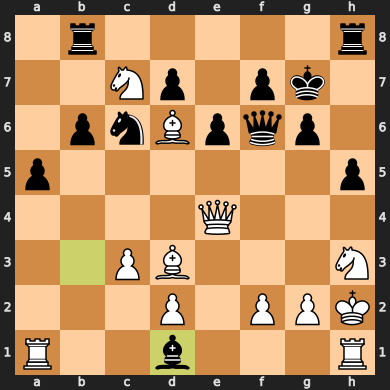



-h1d1




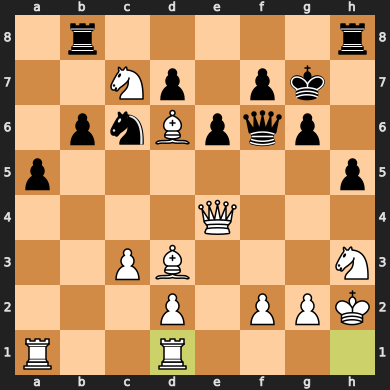



-e6e5




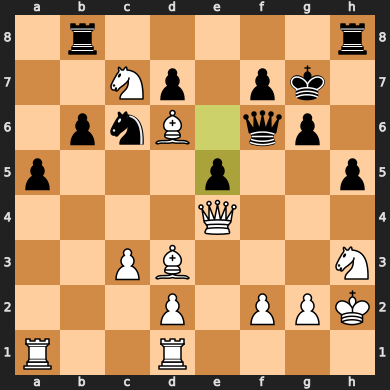



-d6a3




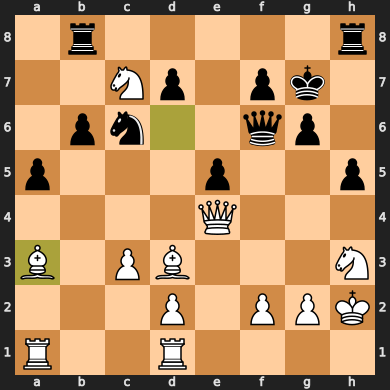



-d7d5




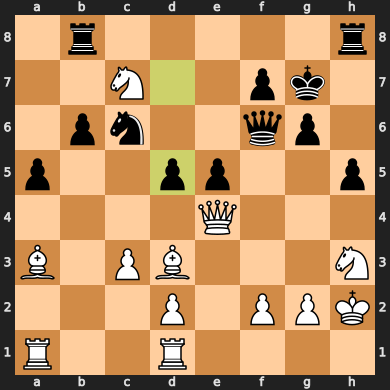



-e4d5




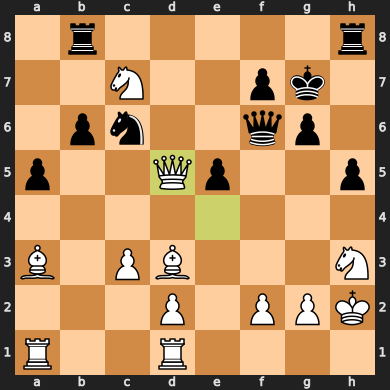



-e5e4




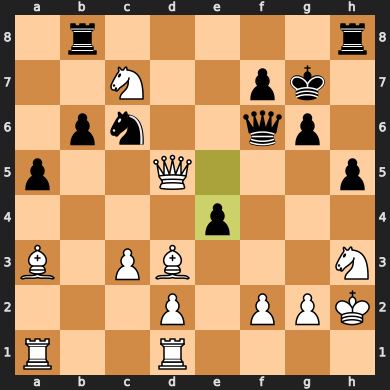



-d5e4




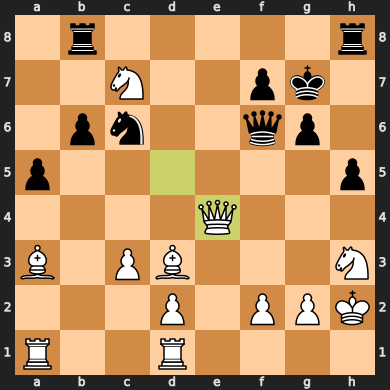



-c6a7




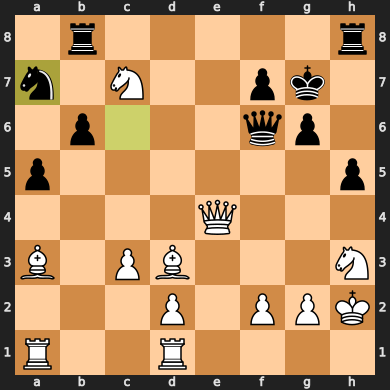



-d1h1




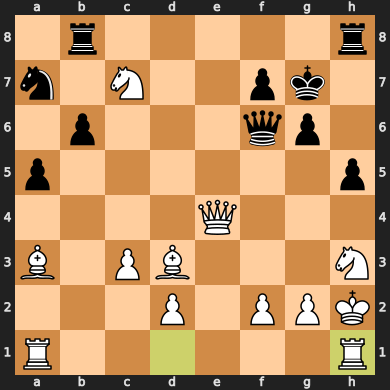



-h5h4




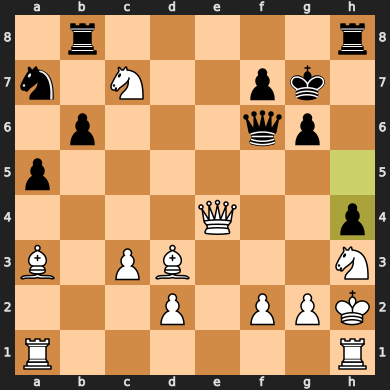



-e4d5




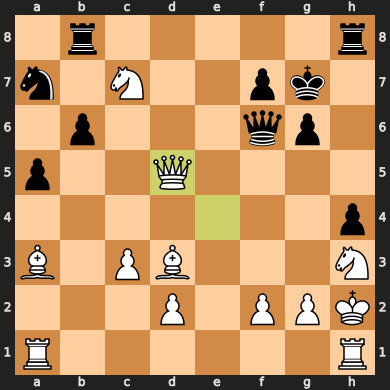



-b6b5




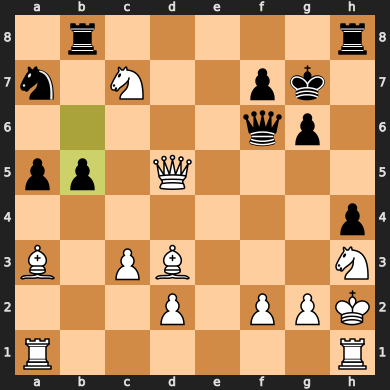



-a3c5




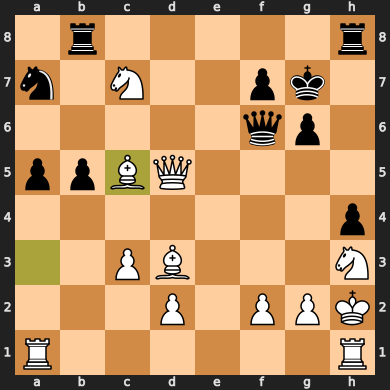



-a5a4




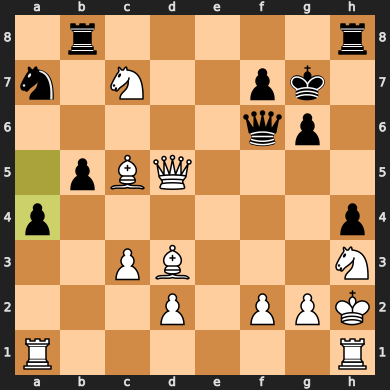



-c5a7




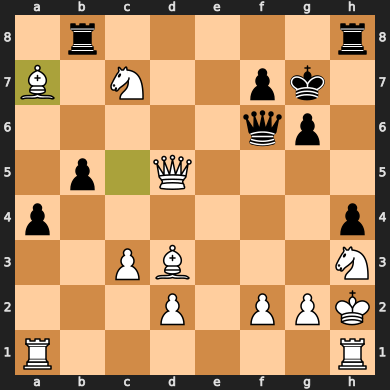



-b8c8




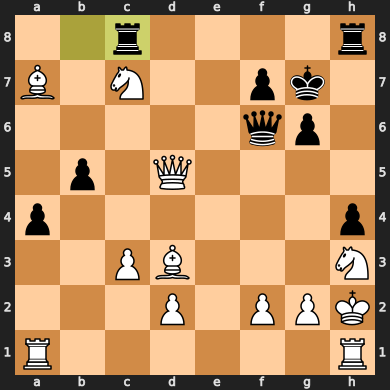



-c7b5




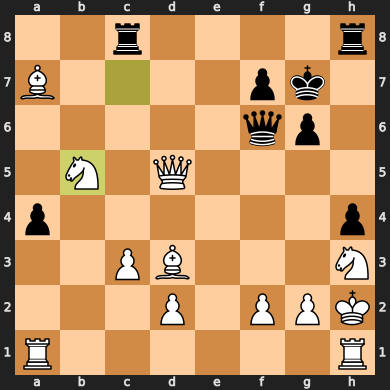



-a4a3




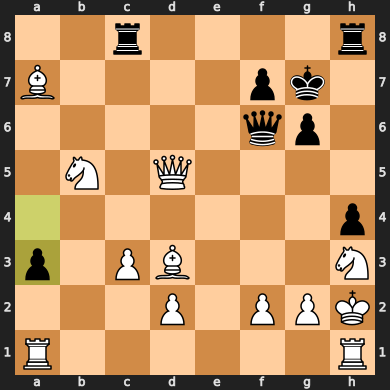



-b5a3




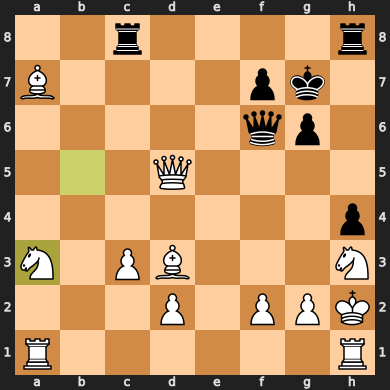



-f6e7




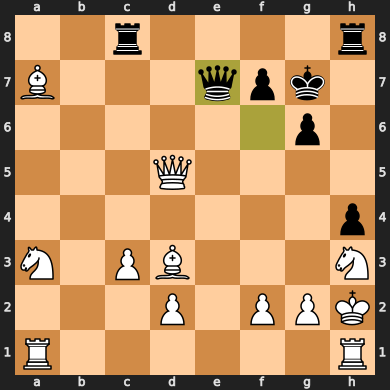



-a7d4




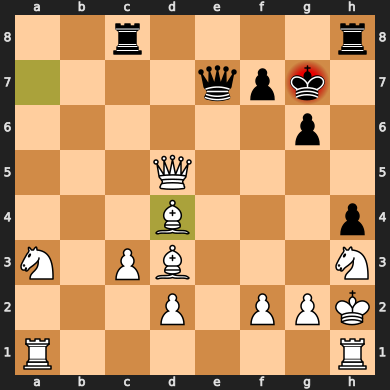



-f7f6




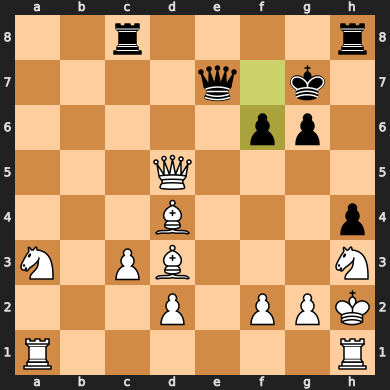



-a3c2




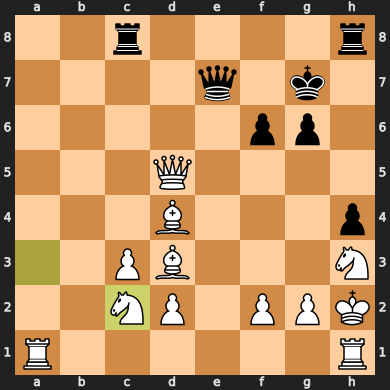



-c8b8




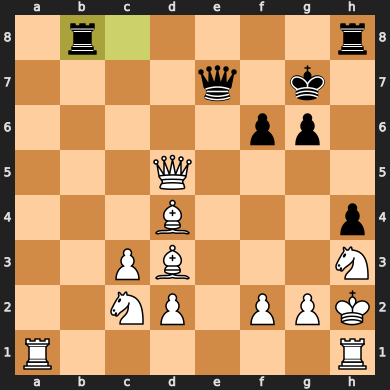



-h3f4




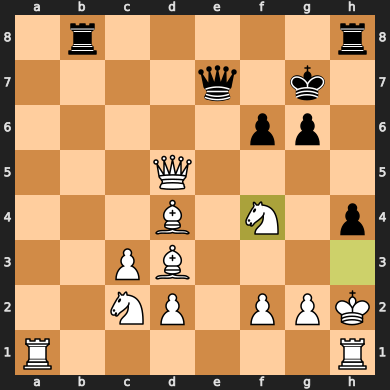



-h4h3




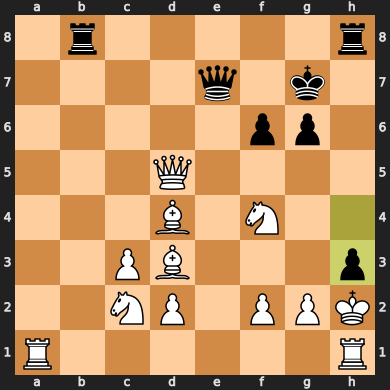



-d3g6




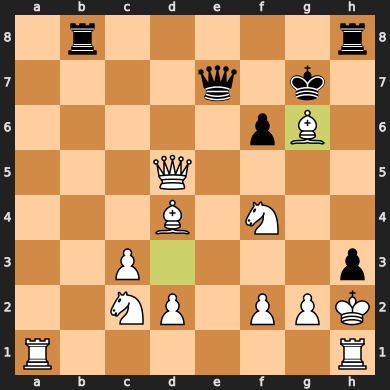



-h3g2




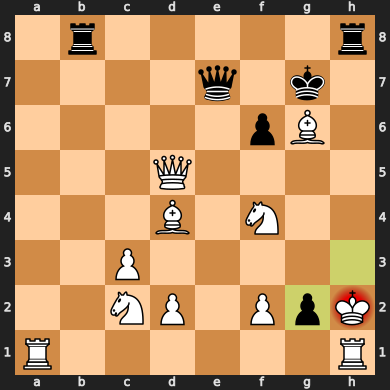



-f4h5




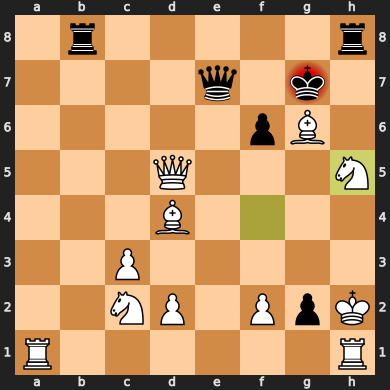



-g7g6




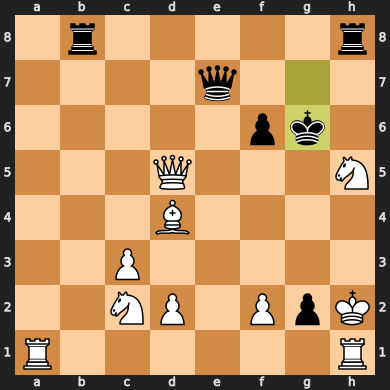



-h2g2




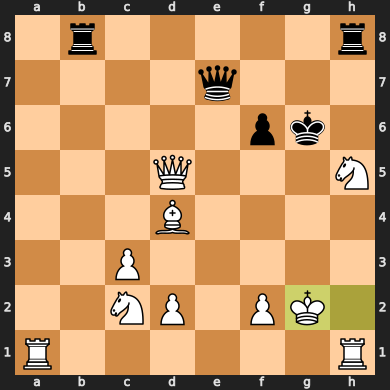



-e7c7




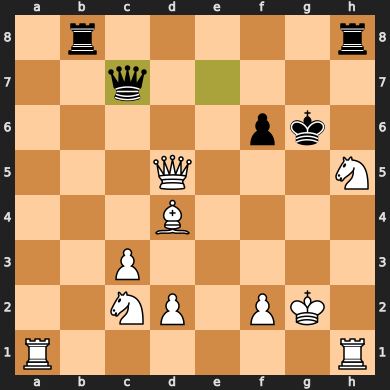



-d5e4




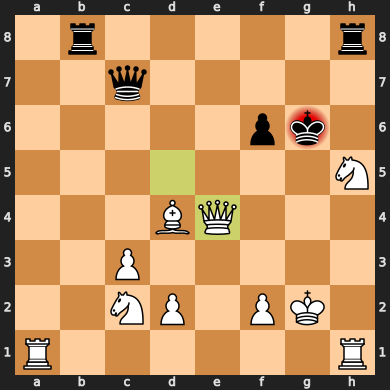



-g6f7




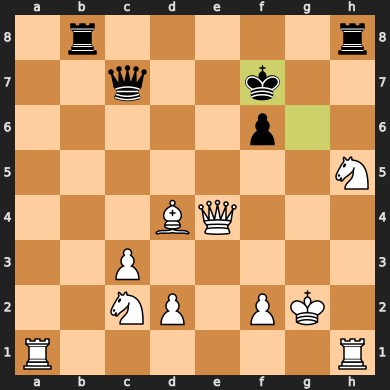



-e4d5




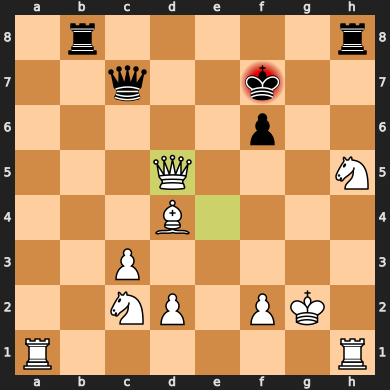



-f7e7




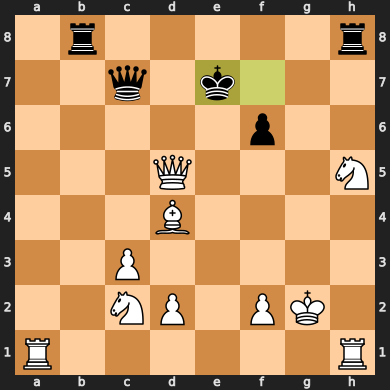



-d4f6




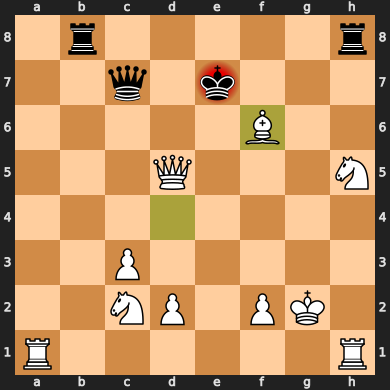



-e7f8




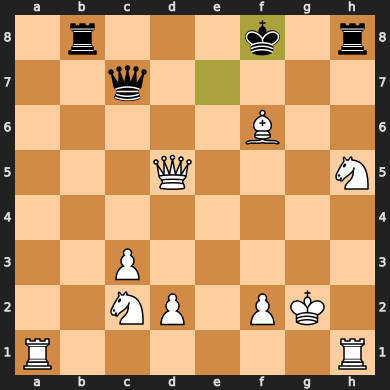



-f6h8




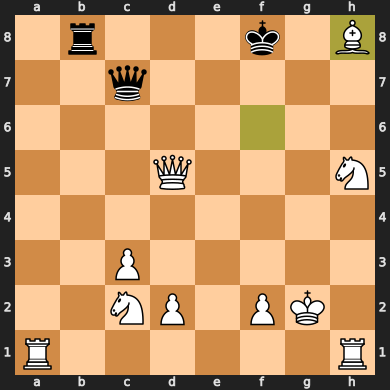



-c7e7




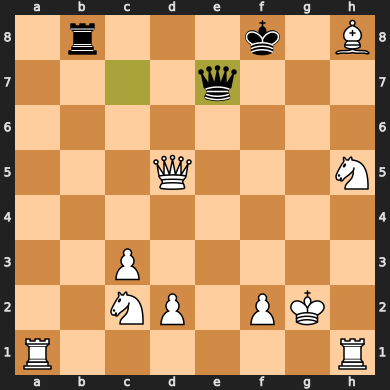



-h5f4




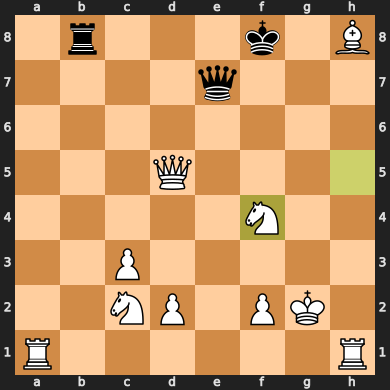



-b8b6




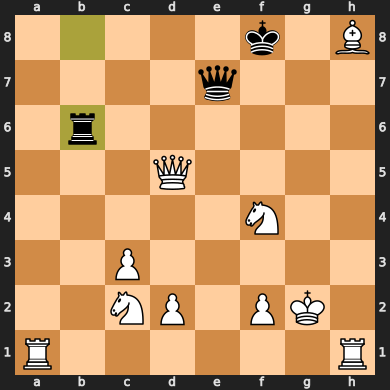



-h8d4




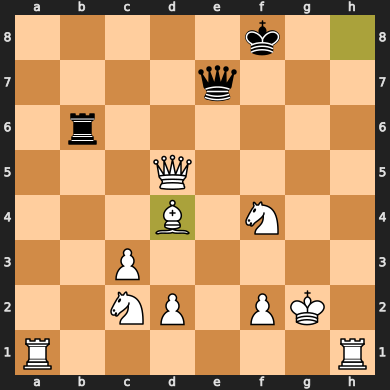



-b6g6




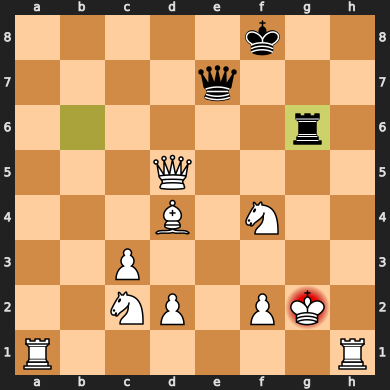



-f4g6




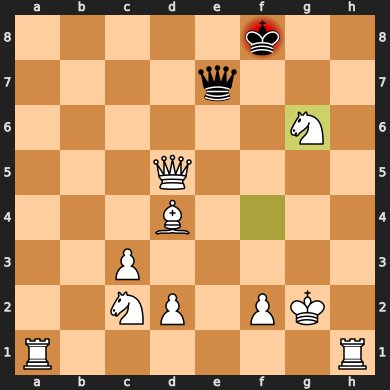



-f8e8




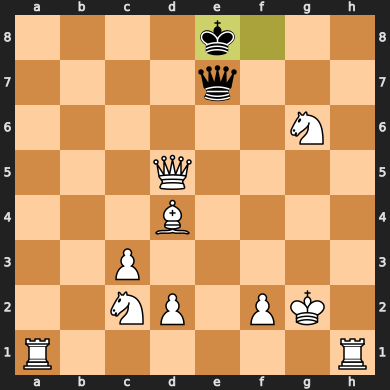



-g6e7




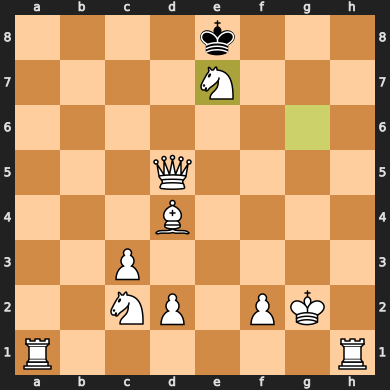



-e8e7




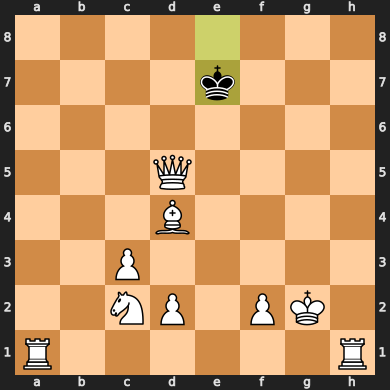



-d5f5




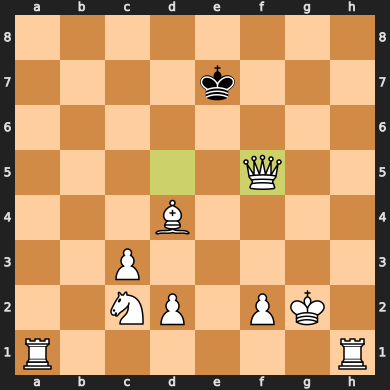



-e7e8




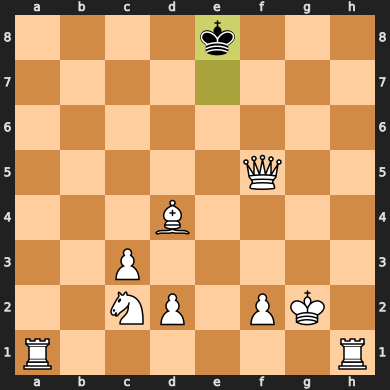



-f5e6




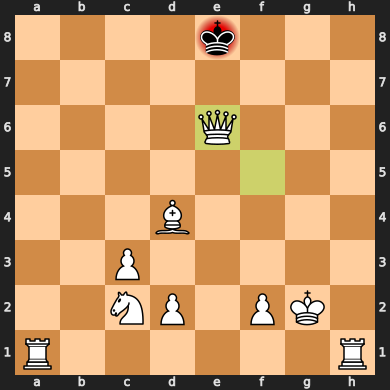



-e8f8




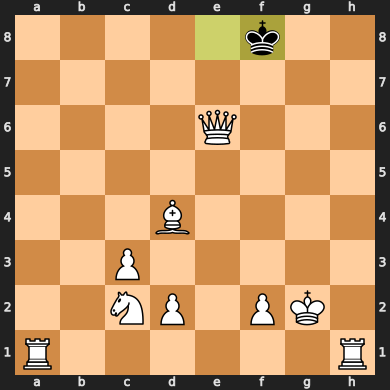



-h1h8




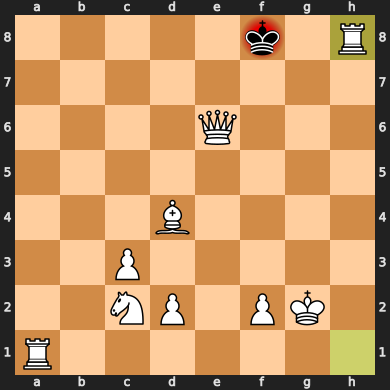



Final situation



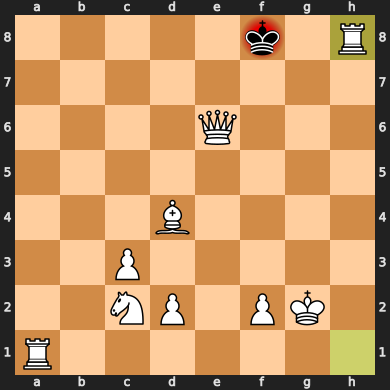



1-0
Cause of termination: Checkmate
# of moves: 103


In [14]:
state = ChessState()

print('Start situation\n')
state.show()
print('Sequence of moves:\n')

while not(state.final()):
    action = state.nextAction()
    infrastructure.main(state, action)
    state.show()
    
print('Final situation\n')
state.show()
state.result()

Giocando una partita con le impostazioni descritte precedentemente il bianco vince dopo 103 mosse, naturalmente non le migliori mosse possibili da fare nelle varie situazioni, a volte anzi sono addiritura insensate e svantaggiose per il determinato giocatore. Comunque sia l'algoritmo funziona e cambiando la profondità per il MinMax si ottengono risultati diversi, anche se già impostando la profondità uguale a 3 l'esecuzione diventa sensibilmente più lenta senza utilizzare l'alpha-beta pruning.